In [21]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt  

In [22]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "/Users/xueyilu/Desktop/CryptoClustering/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [23]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [24]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [25]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [26]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaler.fit_transform(df_market_data), columns=df_market_data.columns)

# Copy the crypto names from the original data
# Set the coinid column as index
df_scaled.set_index(df_market_data.index, inplace=True)

# Display sample data
df_scaled.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [27]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)

In [31]:
# Create an empty list to store the inertia values
inertias = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(df_scaled)  # Ensure df_scaled is your DataFrame with the scaled data
    inertias.append(model.inertia_)

In [32]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'K': k_values, 'Inertia': inertias}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


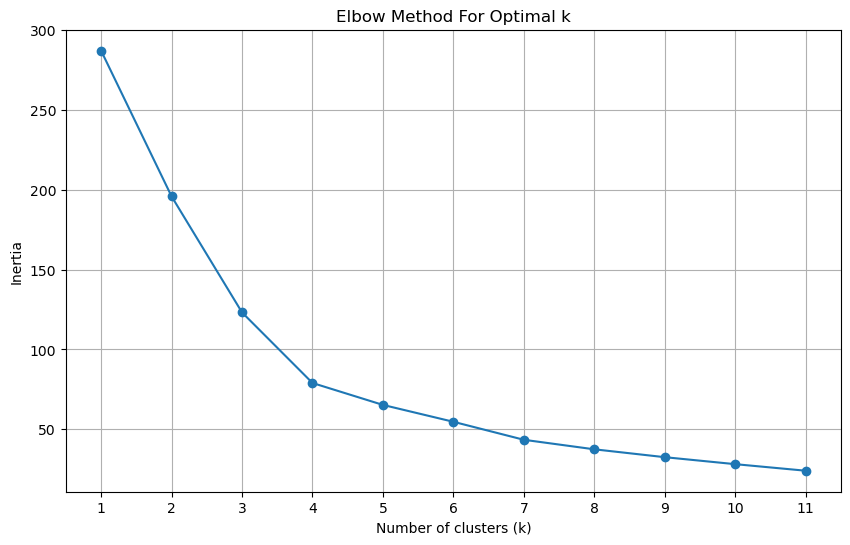

In [33]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['K'], df_elbow['Inertia'], marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values) 
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 1

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [40]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)

In [41]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=1, random_state=42)

In [49]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values
print("Cluster labels:", cluster_labels)


Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [50]:
# Create a copy of the DataFrame
df_market_data_clustered = df_market_data.copy()

In [51]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_clustered['Cluster'] = cluster_labels

# Display sample data
df_market_data_clustered.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


In [75]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
plot = df_market_data_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by='Cluster',
    hover_cols=['coin_id'],
    title="Cryptocurrency Clusters based on 24h and 7d Price Change",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)",
    colormap='viridis'
)

plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [53]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [62]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_scaled)


In [63]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio for each principal component:", explained_variance)
total_explained_variance = explained_variance.sum()
print("Total explained variance by the three principal components:", total_explained_variance)


Explained variance ratio for each principal component: [0.3719856  0.34700813 0.17603793]
Total explained variance by the three principal components: 0.895031657030984


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.895031657030984

In [61]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])
# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
df_pca['coin_id'] = df_scaled.index

# Set the coinid column as index
df_pca.set_index('coin_id', inplace=True)


# Display sample data
print("First five rows of the PCA DataFrame:")
print(df_pca.head())

First five rows of the PCA DataFrame:
                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [81]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)

In [82]:
# Create an empty list to store the inertia values
inertias = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_pca)    
    inertias.append(model.inertia_)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

In [83]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'K': k_values, 'Inertia': inertias}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


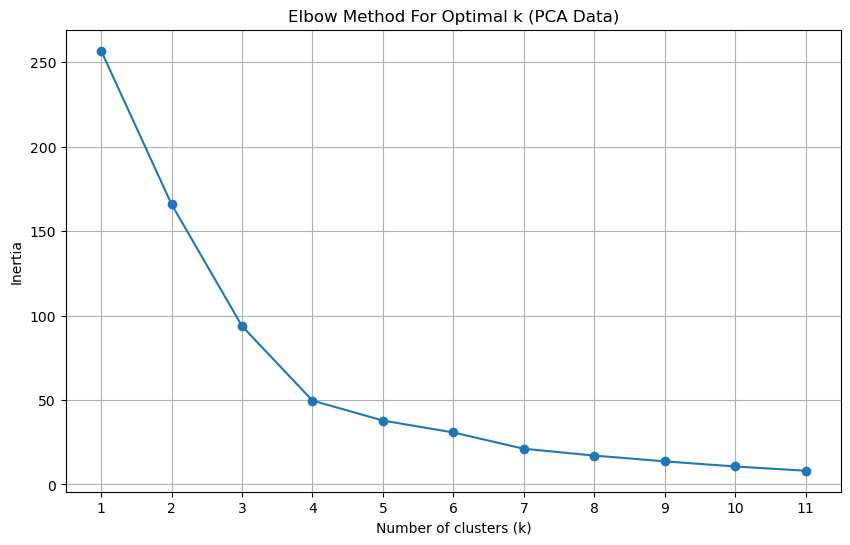

In [84]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['K'], df_elbow['Inertia'], marker='o')
plt.title('Elbow Method For Optimal k (PCA Data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**1


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [69]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

In [70]:
# Fit the K-Means model using the PCA data
kmeans.fit(df_pca)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=1, random_state=42)

In [71]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans.predict(df_pca)
# Print the resulting array of cluster values.
print("Cluster labels:", clusters)

Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [73]:
# Create a copy of the DataFrame with the PCA data
df_pca_clustered = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_clustered['Cluster'] = clusters

# Display sample data
df_pca_clustered.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [74]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
plot = df_pca_clustered.hvplot.scatter(
    x="PC1",
    y="PC2",
    by='Cluster',
    hover_cols=['coin_id'],  # Assuming 'coin_id' is a column; if not, you may need to adjust
    title="PCA Cluster Plot",
    xlabel="Principal Component 1",
    ylabel="Principal Component 2",
    colormap='viridis'
)

plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [85]:
k_values = range(1, 12)
inertias_original = []  # This will store inertia from the original scaled data
inertias_pca = []       # This will store inertia from the PCA data

# Calculate for original scaled data
for k in k_values:
    model_original = KMeans(n_clusters=k, random_state=42)
    model_original.fit(df_scaled)    
    inertias_original.append(model_original.inertia_)

# Calculate for PCA data
for k in k_values:
    model_pca = KMeans(n_clusters=k, random_state=42)
    model_pca.fit(df_pca)
    inertias_pca.append(model_pca.inertia_)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

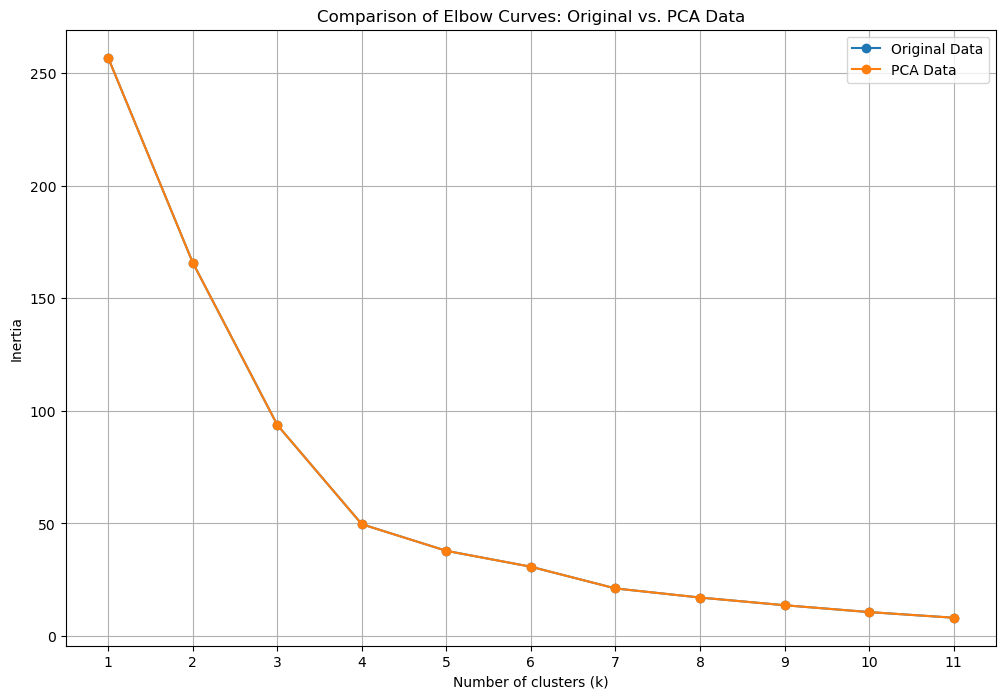

In [87]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(12, 8))
plt.plot(k_values, inertias, label='Original Data', marker='o')
plt.plot(k_values, inertias_pca, label='PCA Data', marker='o')
plt.title('Comparison of Elbow Curves: Original vs. PCA Data')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


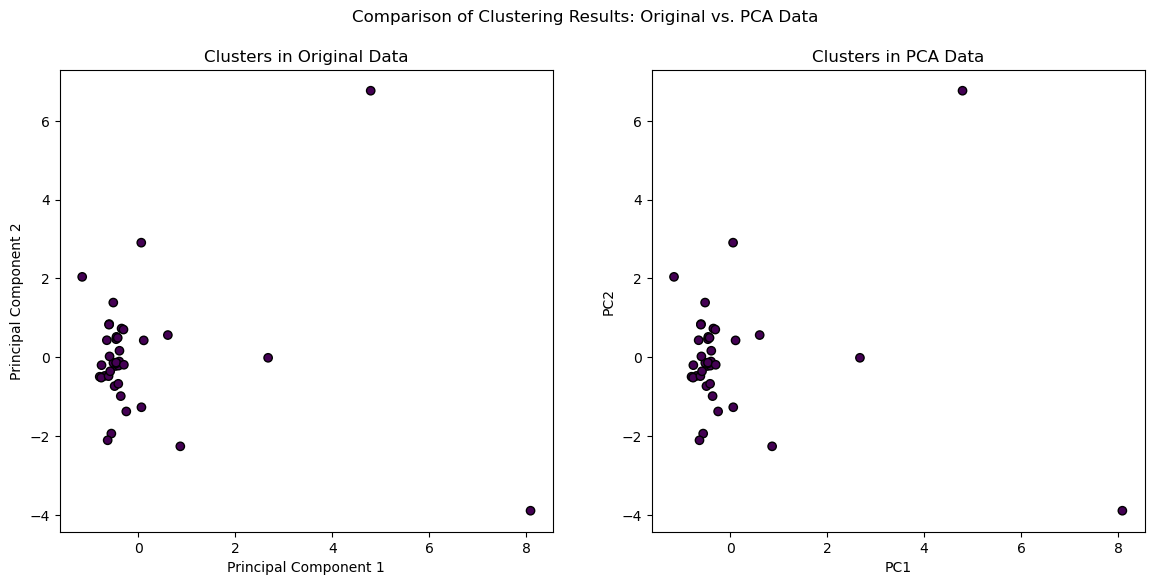

In [90]:
# Clustering on original data
kmeans_original = KMeans(n_clusters=optimal_k, random_state=42)
clusters_original = kmeans_original.fit_predict(df_scaled)  # Fit and predict cluster labels

# Clustering on PCA data
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
clusters_pca = kmeans_pca.fit_predict(df_pca)

# PCA for visualization of the original dataset (if not already done)
pca_for_viz = PCA(n_components=2)
original_data_reduced = pca_for_viz.fit_transform(df_scaled)

# Scatter plot for original data reduced to two dimensions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  # First subplot for original data
plt.scatter(original_data_reduced[:, 0], original_data_reduced[:, 1], c=clusters_original, cmap='viridis', marker='o', edgecolor='k')
plt.title('Clusters in Original Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Scatter plot for PCA data
plt.subplot(1, 2, 2)  # Second subplot for PCA data
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=clusters_pca, cmap='viridis', marker='o', edgecolor='k')
plt.title('Clusters in PCA Data')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.suptitle('Comparison of Clustering Results: Original vs. PCA Data')
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Same??